In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


<h4>Libraries that I have used for this project:-
    
1. pandas - Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
    
2. matplotlib - Matplotlib is a popular plotting library in Python used for creating high-quality visualizations and graphs. It can create different types of visualization reports like line plots, scatter plots, histograms, bar charts, pie charts, box plots, and many more different plots.

<h4>I use the pandas library to load a dataset stored in a CSV file into a DataFrame. The dataset is named 'AB_NYC_2019.csv' and is imported using the 'read_csv' function provided by pandas. This function reads the CSV file and converts it into a DataFrame, which allows for easy manipulation and analysis of the data within Python.

In [2]:
df=pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<h4>I've used the info() function to inspect the DataFrame, which provides information about the data types of each column and the presence of any missing values (null values).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<h4>I've selected specific columns from the dataset to conduct exploratory data analysis (EDA).

In [5]:
selected_columns = ['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365'
]

In [6]:
len(selected_columns)

13

<h4>Let's extract a copy of the data from these columns into a new data frame ny_df. We can continue to modify further without affecting the original data frame.

In [7]:
ny_df = df[selected_columns].copy()


In [8]:
ny_df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,2


In [9]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   48895 non-null  int64  
 1   name                 48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   neighbourhood_group  48895 non-null  object 
 4   neighbourhood        48895 non-null  object 
 5   latitude             48895 non-null  float64
 6   longitude            48895 non-null  float64
 7   room_type            48895 non-null  object 
 8   price                48895 non-null  int64  
 9   minimum_nights       48895 non-null  int64  
 10  number_of_reviews    48895 non-null  int64  
 11  reviews_per_month    38843 non-null  float64
 12  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB


<h4>I've examined each column in the DataFrame ny_df to identify any null values, employing the isna() function for this purpose. Subsequently, I've used the sum() function to compute the total count of null values present in each column.

In [10]:
ny_df.isna().sum()

id                         0
name                      16
host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

**<h1>Data Cleaning**

<h4>I first calculated the median value of the 'reviews_per_month' column in the DataFrame ny_df using the median() function. Then, I filled the null values in the 'reviews_per_month' column with this calculated median value using the fillna() function.

In [11]:
ny_df['reviews_per_month'].median()

0.72

In [12]:
ny_df['reviews_per_month'] = ny_df.reviews_per_month.fillna(ny_df.reviews_per_month.median())

In [13]:
ny_df.isna().sum()

id                      0
name                   16
host_id                 0
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month       0
availability_365        0
dtype: int64

<h4>I've removed rows containing any null values from the DataFrame ny_df using the dropna() function with the parameter axis=0 to specify dropping rows. After dropping these rows, I calculated the difference in the length of the DataFrame before and after the operation to determine the number of rows that were dropped due to missing values.

In [14]:
#Dropping null values and counting the dropped rows
ny_df = ny_df.dropna(axis = 0, how ='any') #Dropping Rows with at least 1 null value
print(len(ny_df) - len(ny_df ), 'rows were dropped with missing values.') 

0 rows were dropped with missing values.


In [15]:
df.number_of_reviews.value_counts()

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: count, Length: 394, dtype: int64

In [16]:
ny_df.isna().sum()

id                     0
name                   0
host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

<h4>I'm generating descriptive statistics for the DataFrame ny_df using the describe() function. This will provide information such as the mean, count, minimum, and maximum values for each numerical column, helping to identify any potential outliers or anomalies in the data.

In [17]:
ny_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.887900e+04,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,1.902062e+07,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.239169,112.788989
std,1.098282e+07,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.521043,131.613322
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,0.000000
25%,9.474248e+06,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,0.000000
50%,1.968643e+07,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,45.000000
75%,2.915334e+07,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,1.580000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


<h4>I'm exploring the distributions of numeric columns within the DataFrame ny_df by generating histograms. The hist() function is being used with parameters figsize=(20,12) to specify the size of the plot, grid=False to remove grid lines, and color='#FF5A5F' to set the color scheme. This visualization aids in understanding the spread and frequency of values in each numeric column.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

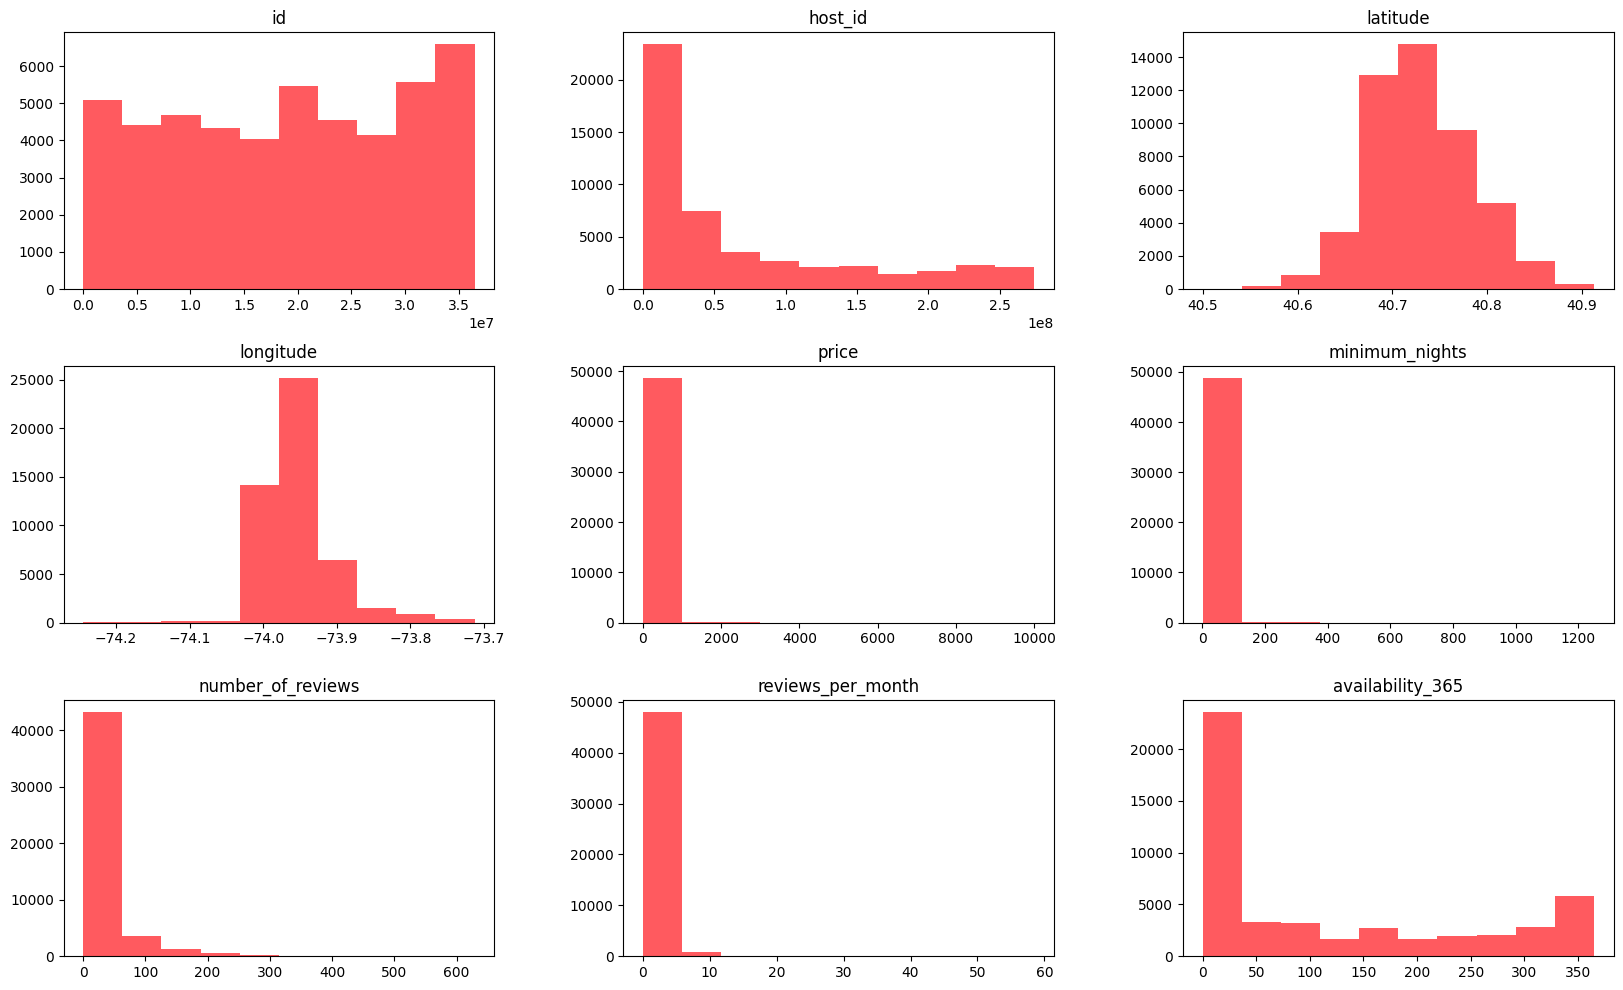

In [18]:
 ny_df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

<h4>I'm importing the matplotlib.pyplot module, which provides functions for creating various types of plots, such as charts and graphs. 

**<h1>Insights**

In [19]:
import matplotlib.pyplot as plt

<h4>I've grouped the data by 'neighbourhood_group' and 'room_type', calculating the mean prices for each combination. Then, we've pivoted the DataFrame to create a matrix where each row represents a 'neighbourhood_group', each column represents a 'room_type', and the values are the mean prices. 

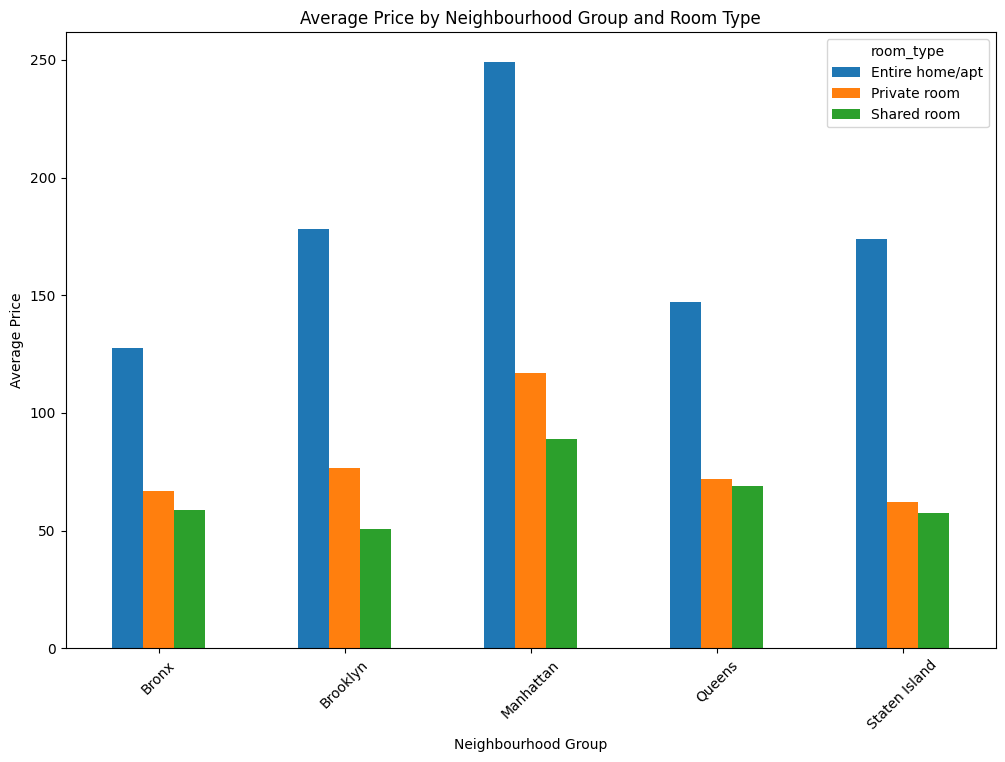

In [20]:
grouped_data = ny_df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

# Pivot the DataFrame to create a matrix where each row represents a 'neighbourhood_group', 
# each column represents a 'room_type', and the values are the mean prices
pivot_data = grouped_data.pivot(index='neighbourhood_group', columns='room_type', values='price')

# Plotting the clustered column chart
pivot_data.plot(kind='bar', figsize=(12, 8))

# Adding title and labels
plt.title('Average Price by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

<h4>We've calculated the average number of reviews for each room type by grouping the data accordingly. Then, we've visualized this data as a bar chart, where each bar represents a room type and its height corresponds to the average number of reviews.

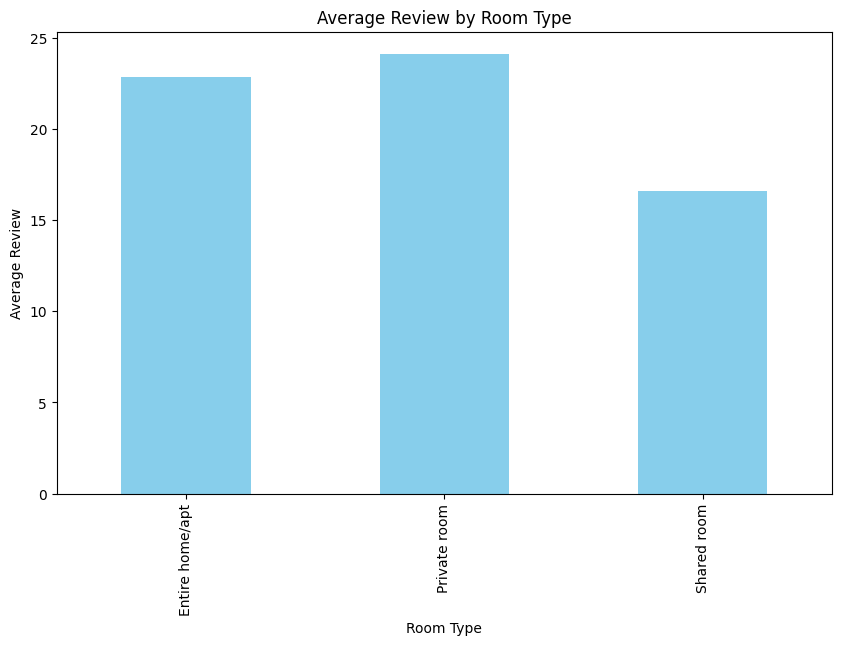

In [21]:
average_review_by_group = ny_df.groupby('room_type')['number_of_reviews'].mean()
average_review_by_group.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Review by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Review')

# Show plot
plt.show()

<h4>I have computed Top 10 areas based on Average Price.






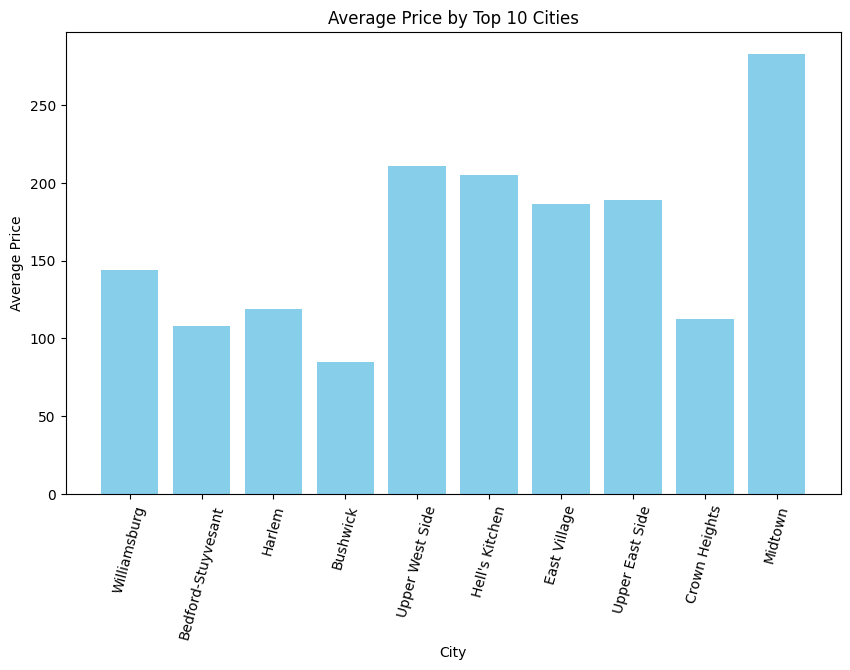

In [22]:

# Get the top 10 cities by count of listings
top_cities = ny_df['neighbourhood'].value_counts().head(10)

# Extract the top 10 city names
top_cities_names = top_cities.index

# Grouping the data by 'neighbourhood' and calculating the mean price for the top 10 cities
average_price_by_city = ny_df.groupby('neighbourhood')['price'].mean().loc[top_cities_names]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_city.index, average_price_by_city.values, color='skyblue')

# Adding labels and title
plt.title('Average Price by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

<h4>Now, I've computed Bottom 10 based on Average Price.

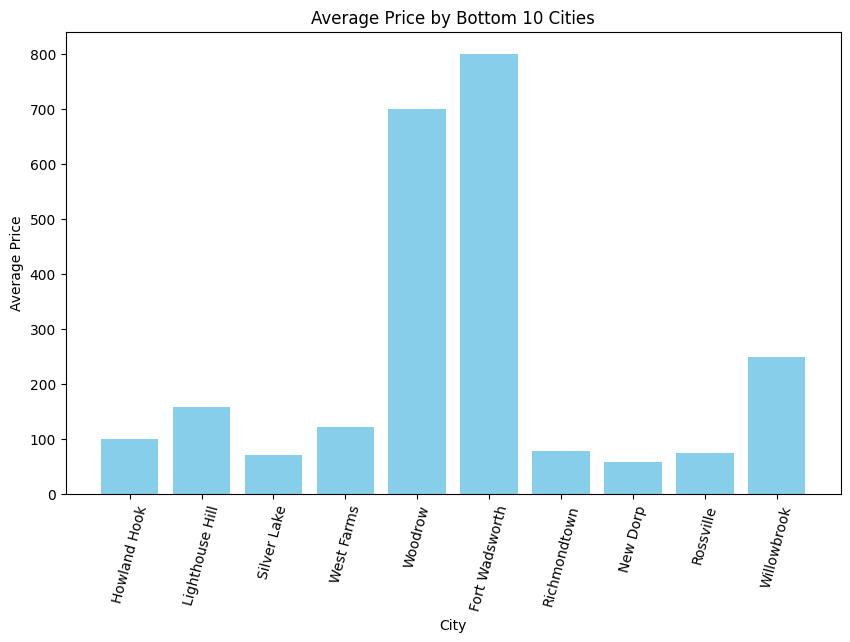

In [23]:
bottom_cities = ny_df['neighbourhood'].value_counts().tail(10)

# Extract the bottom 10 city names
bottom_cities_names = bottom_cities.index

# Grouping the data by 'neighbourhood' and calculating the mean price for the bottom 10 cities
average_price_by_bottom_city = ny_df.groupby('neighbourhood')['price'].mean().loc[bottom_cities_names]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_bottom_city.index, average_price_by_bottom_city.values, color='skyblue')

# Adding labels and title
plt.title('Average Price by Bottom 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


<h4>I've identified the average minimum nights required by room type.

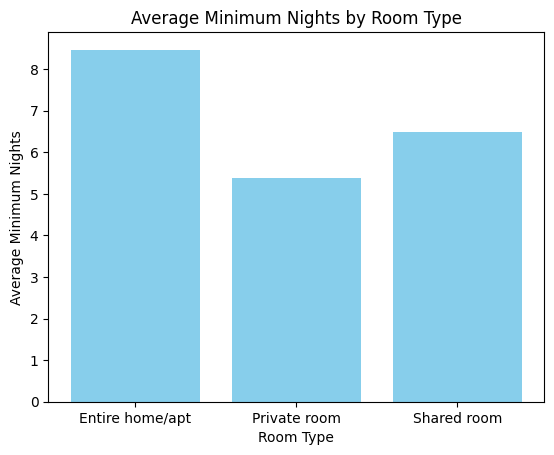

In [24]:
avg_min_nights = ny_df.groupby('room_type')['minimum_nights'].mean()

# Plotting the bar chart
plt.bar(avg_min_nights.index, avg_min_nights.values, color='skyblue')

# Adding title and labels
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')

# Displaying the plot
plt.show()

<h4>Conclusion<h4>
    
    
The analysis yields several noteworthy findings regarding accommodations in New York City:

1. Manhattan emerges as the most expensive neighborhood, with the highest average price among the observed locations, indicating it is the costliest area for accommodations.
2. Private rooms stand out as the most reviewed room type, suggesting they are preferred by guests compared to other room types.
3. Among the top 10 areas, Midtown demonstrates the highest average price for accommodations, highlighting its premium status among the analyzed neighborhoods.
4. Conversely, New Drop emerges as the most affordable option, offering budget-friendly accommodation choices within the dataset.
4. "Entire home/apt" listings exhibit the highest average minimum nights requirement, indicating a preference for longer stays or rental durations in these types of accommodations.
    
These insights provide valuable information for travelers and stakeholders in the hospitality industry, informing decisions related to location selection, room type preferences, and pricing strategies.